In [6]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
titanic_train=pd.read_csv('train.csv')
titanic_test=pd.read_csv('test.csv')

In [3]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
titanic_train.shape

(891, 12)

In [10]:
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
titanic_train['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [12]:
titanic_train['Survived'].value_counts().keys()

Index([0, 1], dtype='int64', name='Survived')

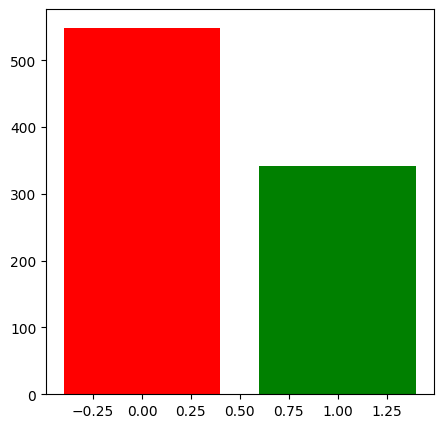

In [13]:
plt.figure(figsize=(5,5))
plt.bar(list(titanic_train['Survived'].value_counts().keys()),list(titanic_train['Survived'].value_counts()),color=['r','g'])
plt.show()

In [14]:
titanic_train['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

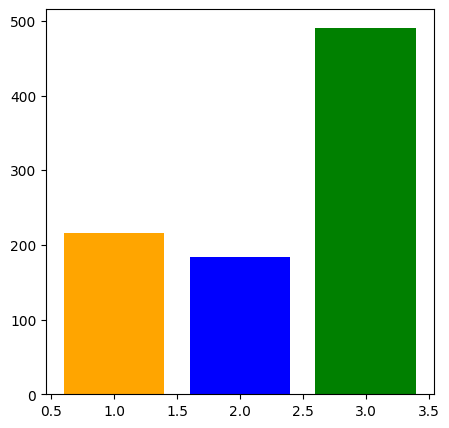

In [15]:
plt.figure(figsize=(5,5))
plt.bar(list(titanic_train['Pclass'].value_counts().keys()),list(titanic_train['Pclass'].value_counts()),color=['green','orange','blue'])
plt.show()

In [16]:
titanic_train['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

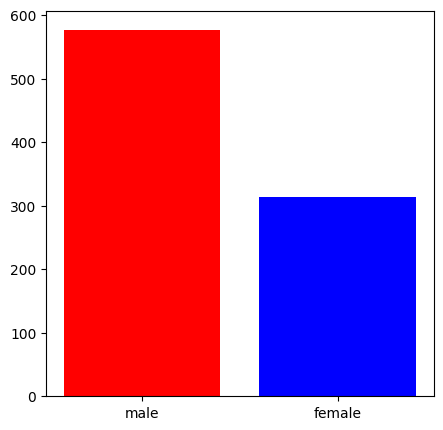

In [17]:
plt.figure(figsize=(5,5))
plt.bar(list(titanic_train['Sex'].value_counts().keys()),list(titanic_train['Sex'].value_counts()),color=['r','b'])
plt.show()

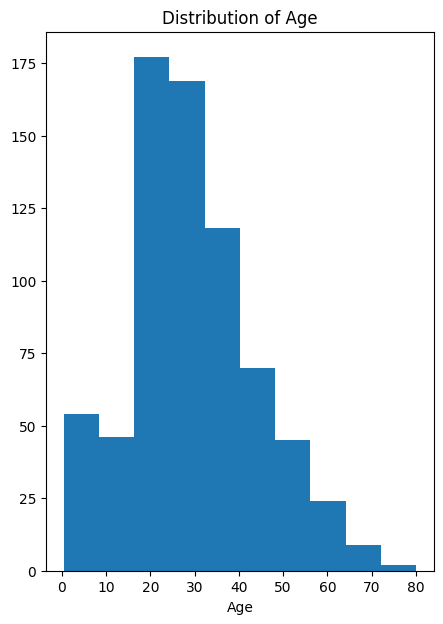

In [18]:
plt.figure(figsize=(5,7))
plt.hist(titanic_train['Age'])
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.show()

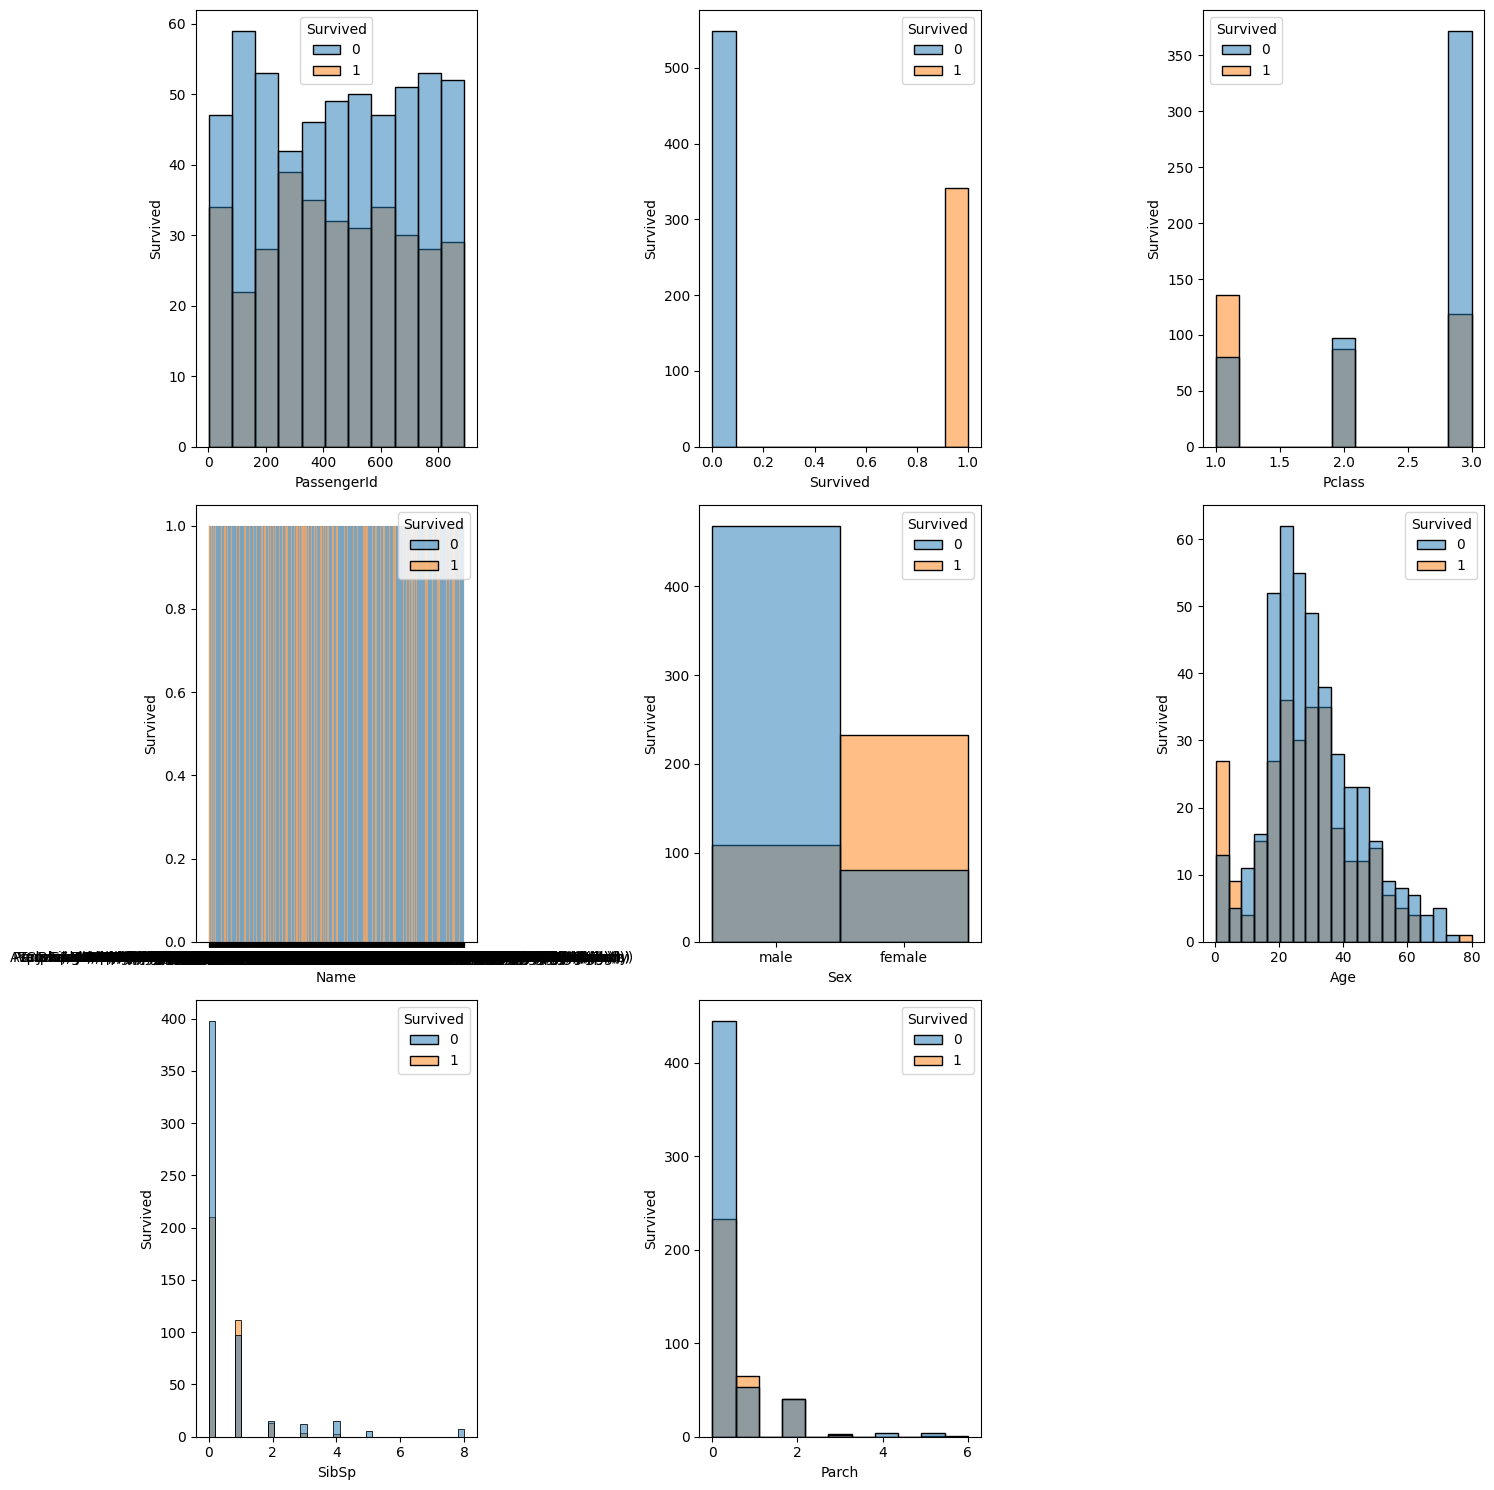

In [8]:
import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize=(15,15))
i=1
for col in titanic_train:
    if i <9:
        ax= plt.subplot(3,3,i)
        sns.histplot(x=titanic_train[col],hue=titanic_train['Survived'])
        plt.xlabel(col)
        plt.ylabel('Survived')
    i=i+1
plt.tight_layout()

In [19]:
titanic_train['Survived'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Survived, Length: 891, dtype: bool

In [20]:
sum(titanic_train['Survived'].isnull())

0

In [21]:
titanic_train["Age"].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [22]:
sum(titanic_train['Age'].isnull())

177

In [23]:
# For drop null values
titanic_train=titanic_train.dropna()

In [24]:
sum(titanic_train['Age'].isnull())
sum(titanic_train['Survived'].isnull())

0

In [25]:
x_train=titanic_train[['Age']]
y_train=titanic_train[['Survived']]

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
dtc =DecisionTreeClassifier()

In [28]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [29]:
sum(titanic_test['Age'].isnull())

86

In [30]:
titanic_test=titanic_test.dropna()

In [31]:
x_test=titanic_test[["Age"]]

In [32]:
y_pred=dtc.predict(x_test)

In [33]:
y_pred

array([1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1])